In [1]:
#!pip install Keras
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras import models 
import keras
from scipy.signal import blackman
from ast import literal_eval
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time

In [2]:
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [3]:
!pip install import-ipynb
import import_ipynb

In [4]:
from create_model import CreateModel

importing Jupyter notebook from create_model.ipynb


# Vector representation of v1 

# Bidirectional model

# Word vectors input

## Dataset

In [5]:
url = 'data/'
url_image='image_data/'

In [6]:
# Reading a csv file named df_node
df_data = pd.read_csv(url+'df_node.csv',converters={'tf-idf': eval}) 
df_data.shape

(11856, 4)

In [7]:
df_data.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  
0       8037              68.201775  
1      11471              42.667847  
2      10517              51.243313  
3       9229              61.277162  
4       2320             174.660634

In [8]:
# Create object of class CreateModel
model_obj=CreateModel()

In [9]:
# Get 10 words with the highest text rank
word_list=model_obj.words_highest_text_rank(df_data)

In [10]:
word_list

['tel_aviv',
 'works',
 'develop',
 'product',
 'engineer',
 'able',
 'technologies',
 'skills',
 'look',
 'team',
 'company']

In [11]:
# Get a normalized tf from a file df_word_vectors_normalize.csv
df_data_norm = pd.read_csv(url+'df_word_vectors_normalize.csv',converters={'tf-idf': eval,'tf-idf_after_norm': eval })

In [12]:
# Merge two data frames
df_data_norm=df_data_norm.drop(['tf-idf'], axis=1)
df_data=pd.merge(df_data, df_data_norm, on=("word"))

In [13]:
df_data.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...

In [14]:
# Enter the normal tf-idf values into the dataset
dataset = pd.DataFrame(df_data['tf-idf_after_norm'].to_list()).iloc[:,:].values
dataset.shape

(11858, 699)

In [15]:
# Choose a number of time steps
n_steps = 40
# Call to function flat_split_sequences_validation
X_train, y_train, X_test, y_test, X_valid, y_valid = model_obj.flat_split_sequences_validation(dataset, n_steps)

In [16]:
y_train_lenght, y_valid_lenght, y_test_lenght= model_obj.get_lenght(X_train, X_valid, y_test)

y_train lenght : 395 , y_valid lenght : 131 , y_test lenght : 133


In [17]:
# Convert into input/output- Call to function reshape_data
X_train, y_train, X_test, y_test, X_valid, y_valid=model_obj.reshape_data(X_train, y_train, X_test, y_test, X_valid, y_valid, n_steps)
n_features = X_train.shape[2]
n_features

1

In [18]:
# Get predictive input data
full_X_train, full_y_train, full_X_test, full_y_test, full_X_valid, full_y_valid=model_obj.get_data_predict( df_data, n_steps)

# log-cosh

In [80]:
name_model='model_v1/LogCosh_Bidirectional_model_all_data_V1'
name_history='history_v1/LogCosh_Bidirectional_model_history_all_data_V1'

In [81]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.LogCosh())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [82]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


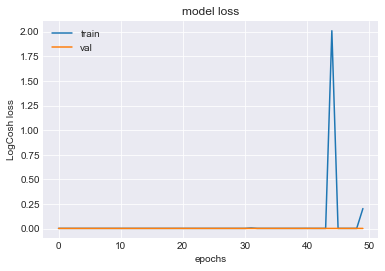

In [83]:
model_obj.model_loss(load_history,'LogCosh')

In [23]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [24]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 213s 4ms/step - loss: 0.0029


0.0029342242050915956

In [25]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.0037535834], [0.0037535834], [0.0037535834...   
1  [[0.0037535834], [0.0037535834], [0.0037535834...   
2  [[0.0037535834], [0.0037535834], [0.0037535834...   
3  [[0.0037535834], [0.0037535834], [0.0037535834...   
4  [[0.0037535834], [0.0037535834], [0.0037535834...   

                                     test_prediction  
0  [[0.0037535834], [0.0037535834], [0.0037535834...  
1  [[0.0037535834], [0.0037535834], [0.0037535834...  
2  [[0.0037535834], [0.0037535834], [0.0037535834...  
3  [[0.0037535834], [0.0037535834], [0.0037535834...  
4  [[0.009712003], [0.00932028], [0.008921778], [...

### Visualization of words prediction - LogCosh loss

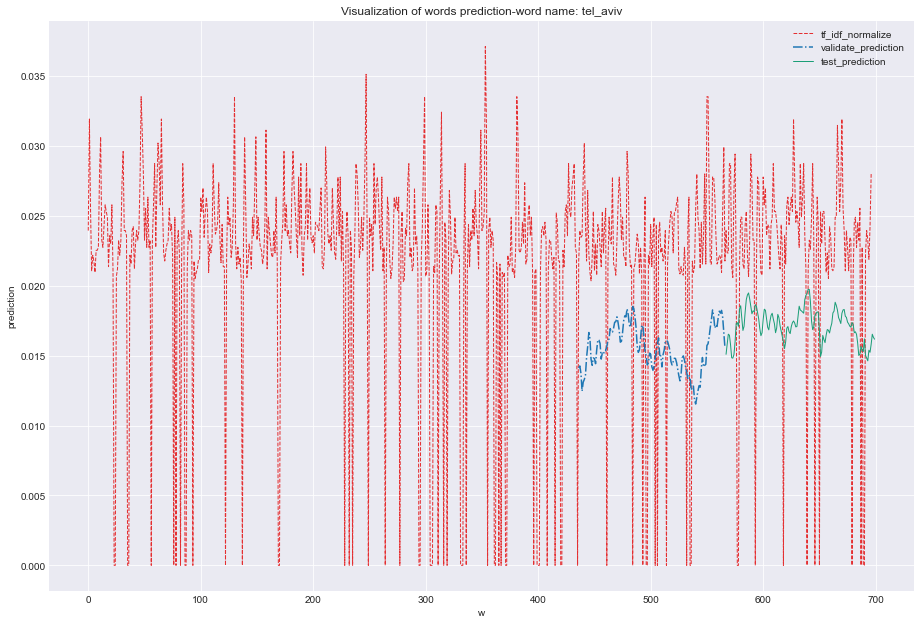

In [26]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

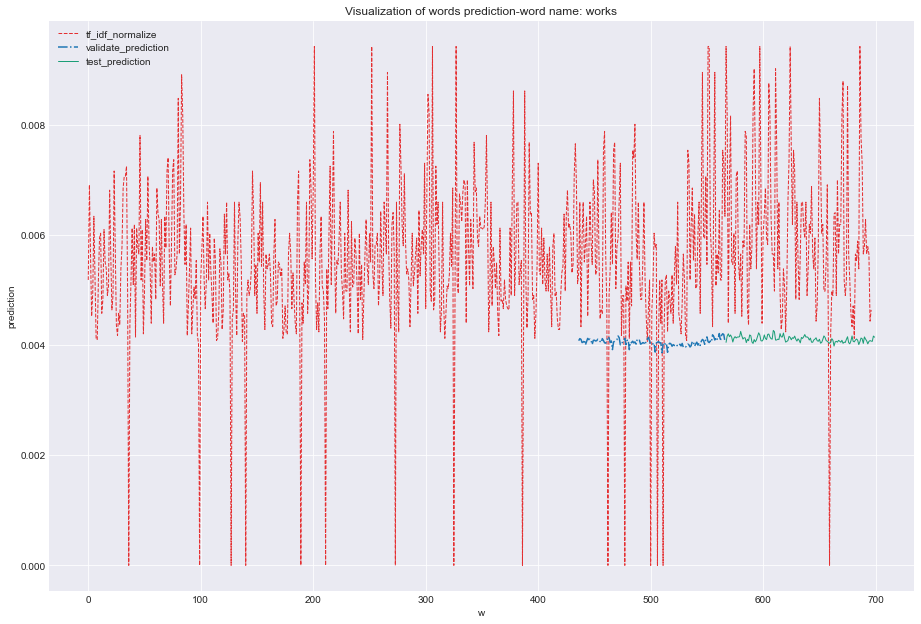

In [27]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

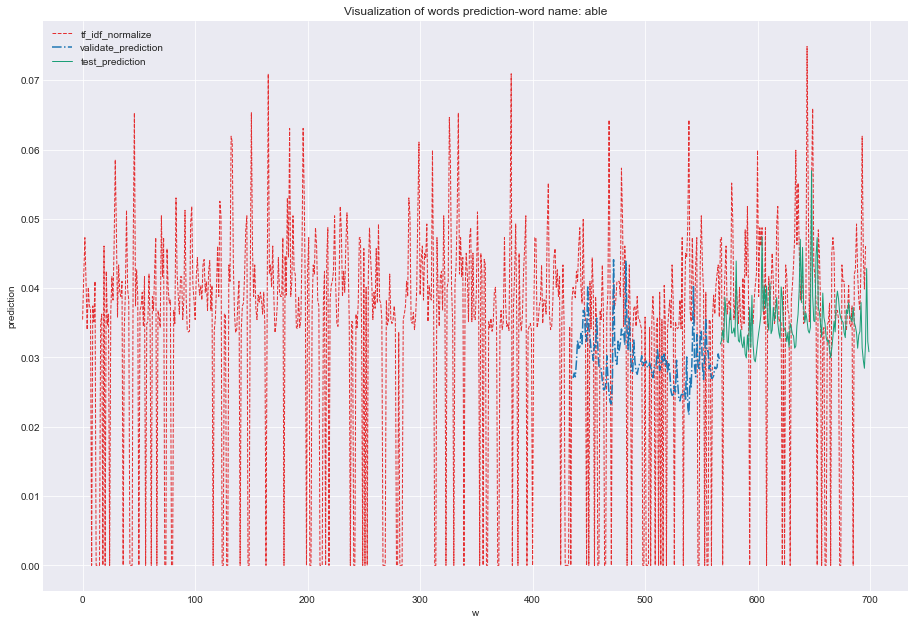

In [28]:
model_obj.data_visualization_prediction(df_prediction,word_list[5:6] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

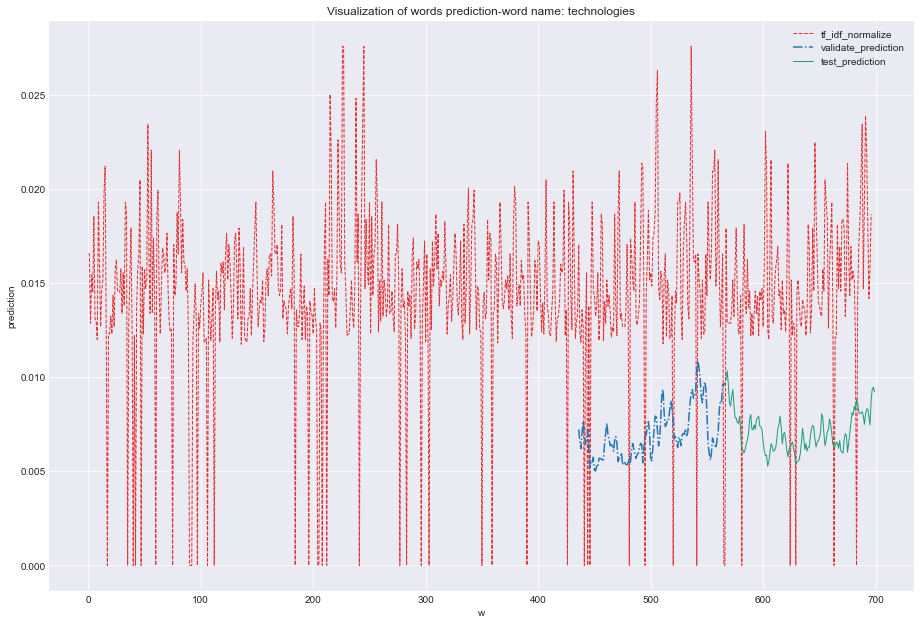

In [29]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

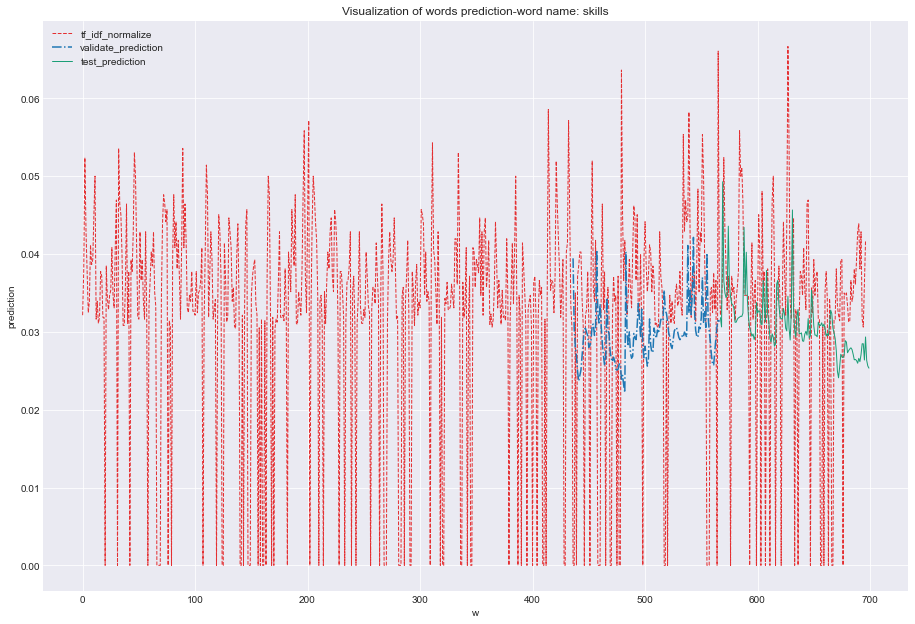

In [30]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

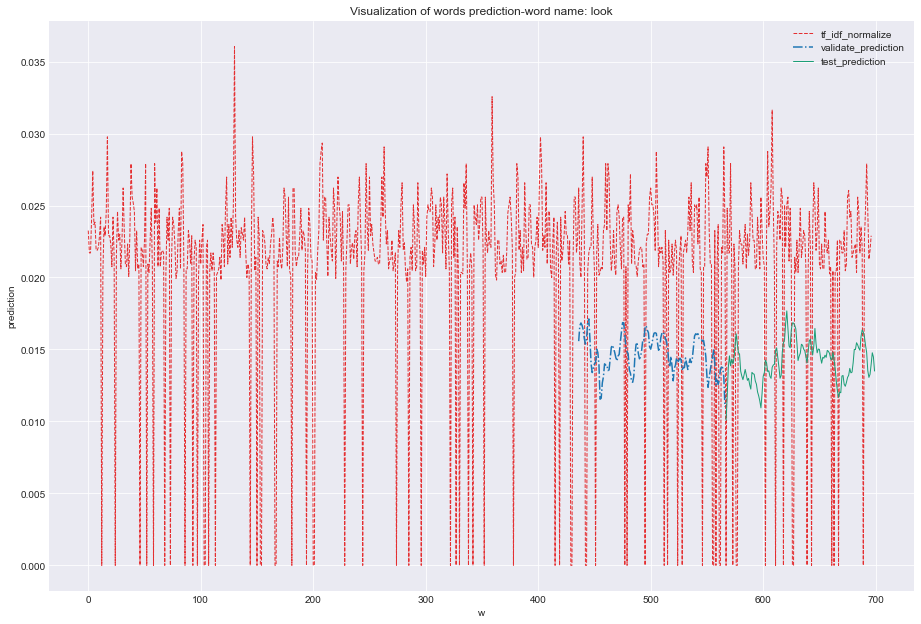

In [31]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] , 2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

# Huber

In [32]:
name_model='model_v1/Huber_Bidirectional_model_all_data_V1'
name_history='history_v1/Huber_Bidirectional_model_history_all_data_V1'

In [33]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps,tf.keras.losses.Huber())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [34]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


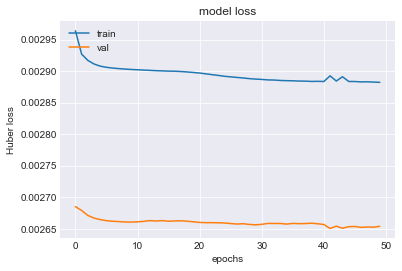

In [35]:
model_obj.model_loss(load_history,'Huber')

In [36]:
# Get a test and valid prediction for a Huber loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [37]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 201s 4ms/step - loss: 0.0032


0.003159760730341077

In [38]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.0034071156], [0.0034071156], [0.0034071156...   
1  [[0.0034071156], [0.0034071156], [0.0034071156...   
2  [[0.0034071156], [0.0034071156], [0.0034071156...   
3  [[0.0034071156], [0.0034071156], [0.0034071156...   
4  [[0.0034071156], [0.0034071156], [0.0034071156...   

                                     test_prediction  
0  [[0.0034071156], [0.0034071156], [0.0034071156...  
1  [[0.0034071156], [0.0034071156], [0.0034071156...  
2  [[0.0034071156], [0.0034071156], [0.0034071156...  
3  [[0.0034071156], [0.0034071156], [0.0034071156...  
4  [[0.011108089], [0.011023577], [0.010953318], ...

### Visualization of words prediction - Huber loss

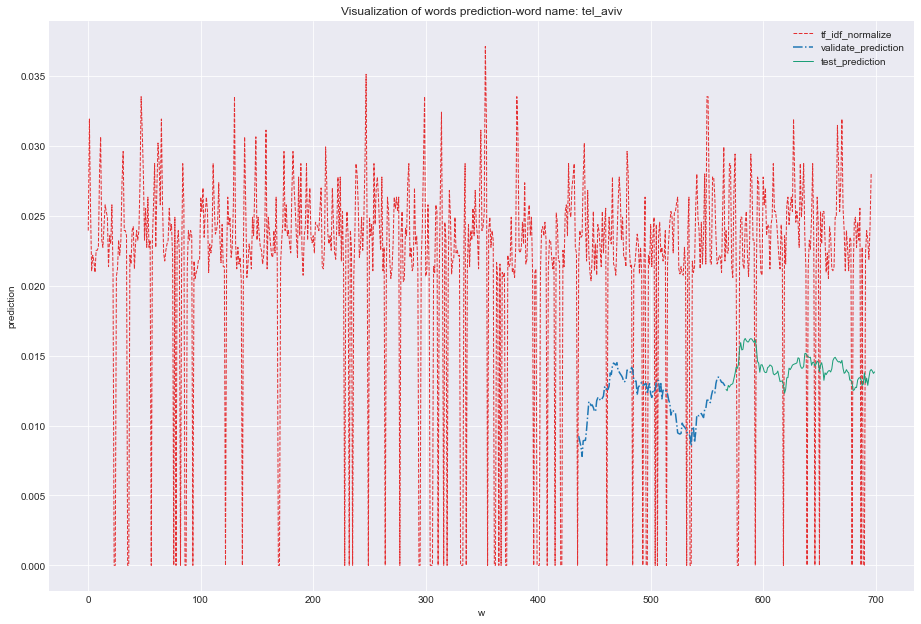

In [39]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

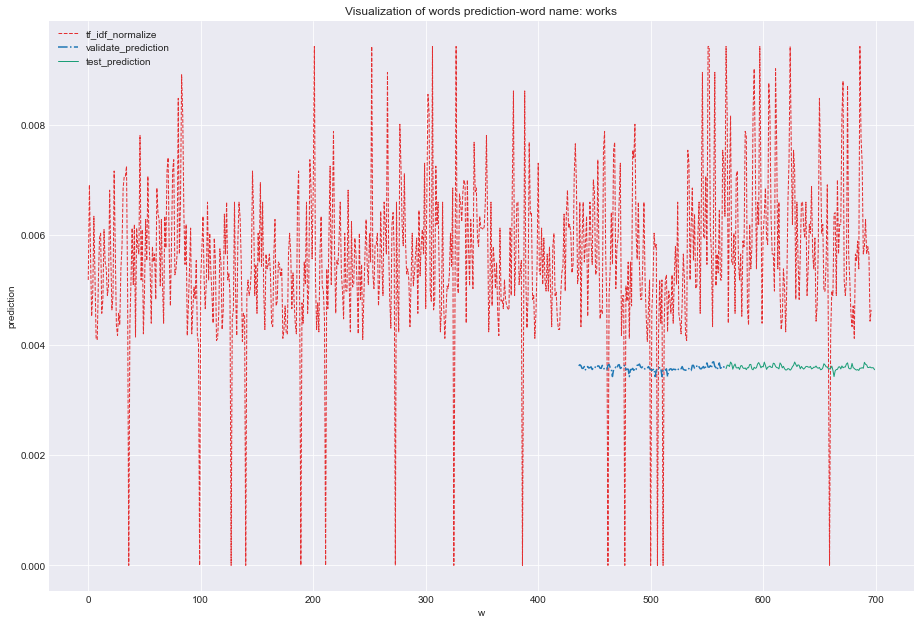

In [40]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

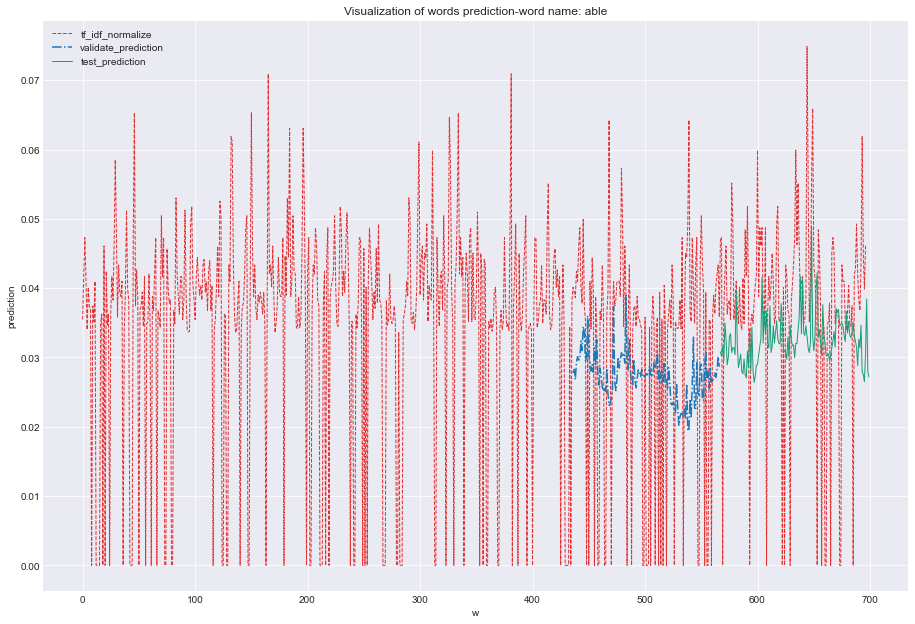

In [41]:
model_obj.data_visualization_prediction(df_prediction,word_list[5:6] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

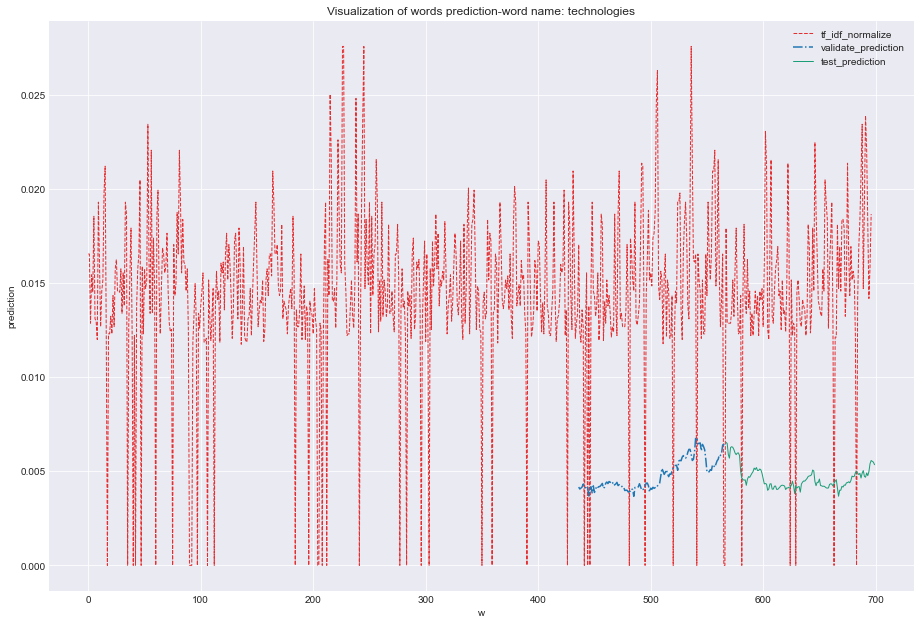

In [42]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

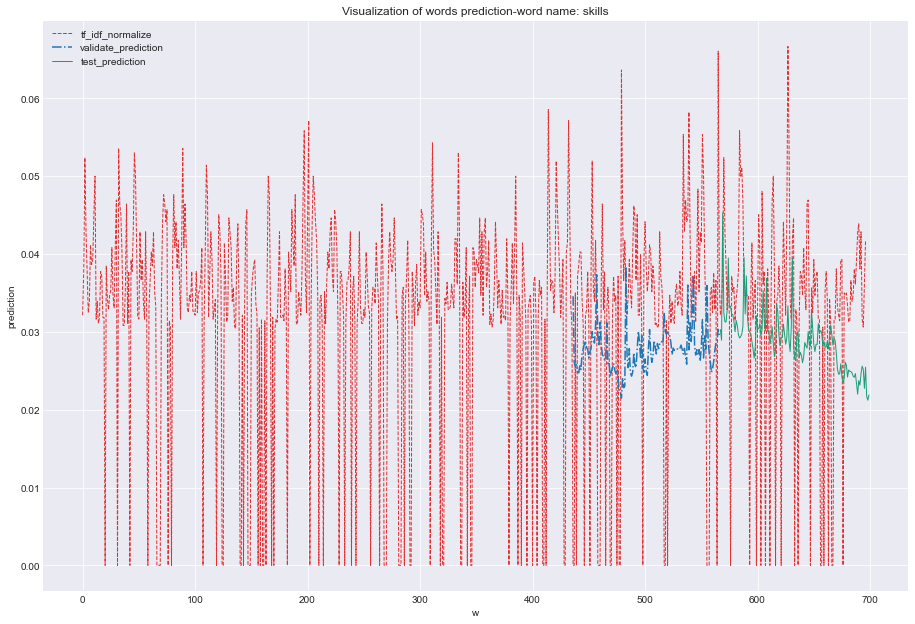

In [43]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

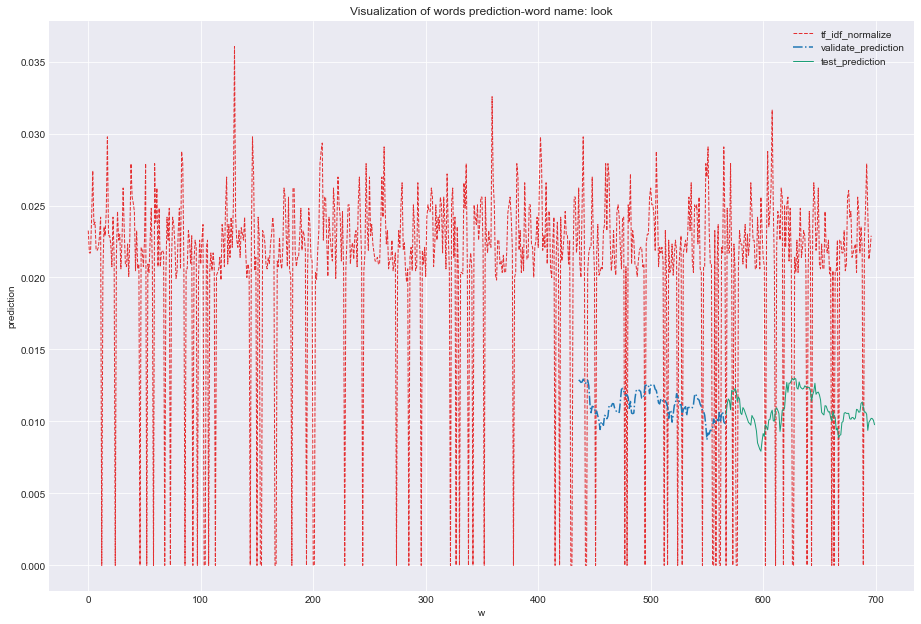

In [44]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## Logarithmic

In [45]:
name_model='model_v1/Logarithmic_Bidirectional_all_data_V1'
name_history='history_v1/Logarithmic_Bidirectional_model_history_all_data_V1'

In [46]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredLogarithmicError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [47]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


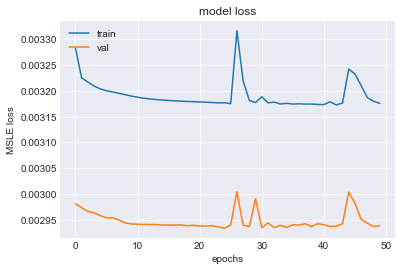

In [48]:
model_obj.model_loss(load_history,'MSLE')

In [49]:
# Get a test and valid prediction for a logcosh loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [50]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 213s 4ms/step - loss: 0.0035


0.0034605369437485933

In [51]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.002994305], [0.002994305], [0.002994305], ...   
1  [[0.002994305], [0.002994305], [0.002994305], ...   
2  [[0.002994305], [0.002994305], [0.002994305], ...   
3  [[0.002994305], [0.002994305], [0.002994305], ...   
4  [[0.002994305], [0.002994305], [0.002994305], ...   

                                     test_prediction  
0  [[0.002994305], [0.002994305], [0.002994305], ...  
1  [[0.002994305], [0.002994305], [0.002994305], ...  
2  [[0.002994305], [0.002994305], [0.002994305], ...  
3  [[0.002994305], [0.002994305], [0.002994305], ...  
4  [[0.009106878], [0.008926069], [0.008765776], ...

### Visualization of words prediction - MSLE loss

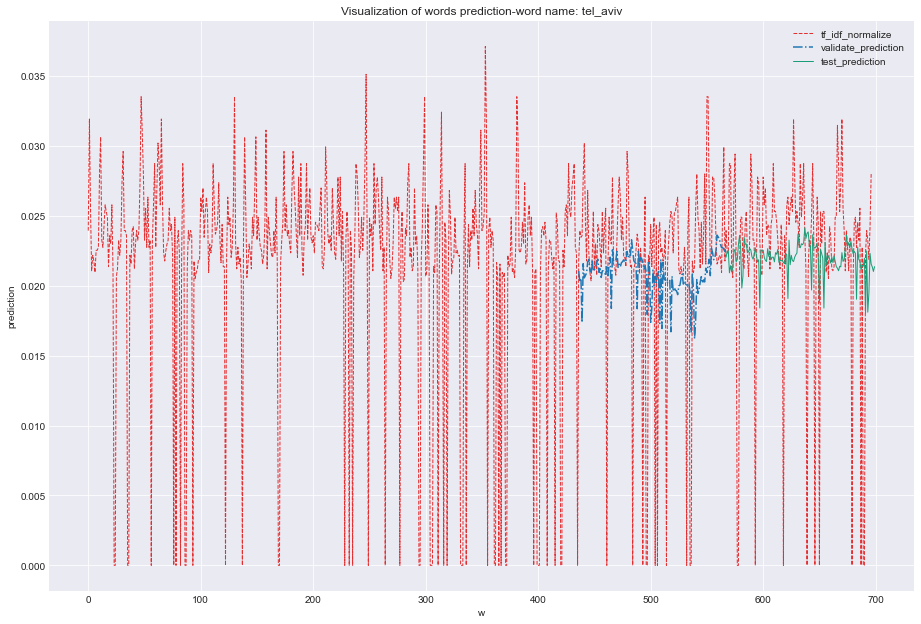

In [52]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

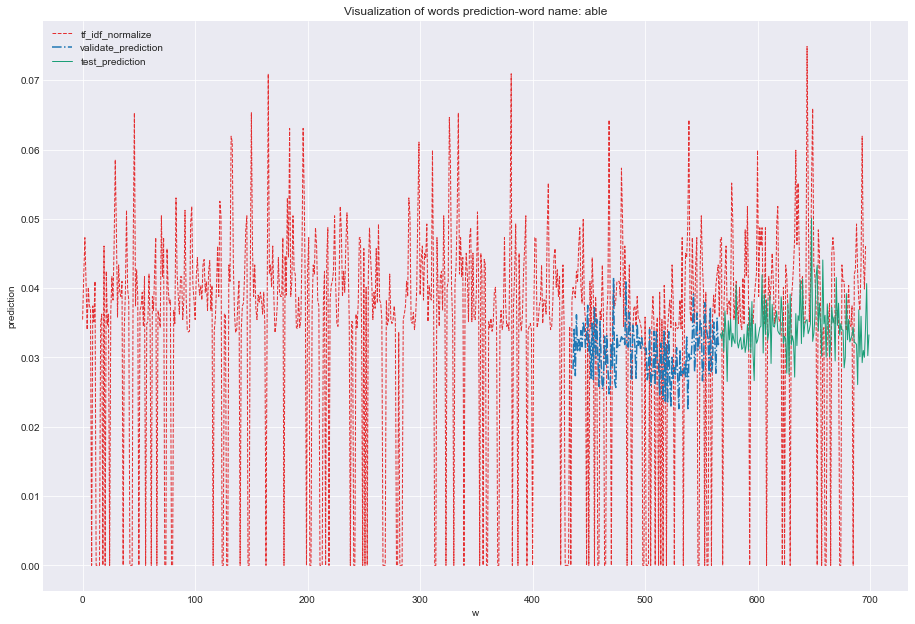

In [53]:
model_obj.data_visualization_prediction(df_prediction,word_list[5:6] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

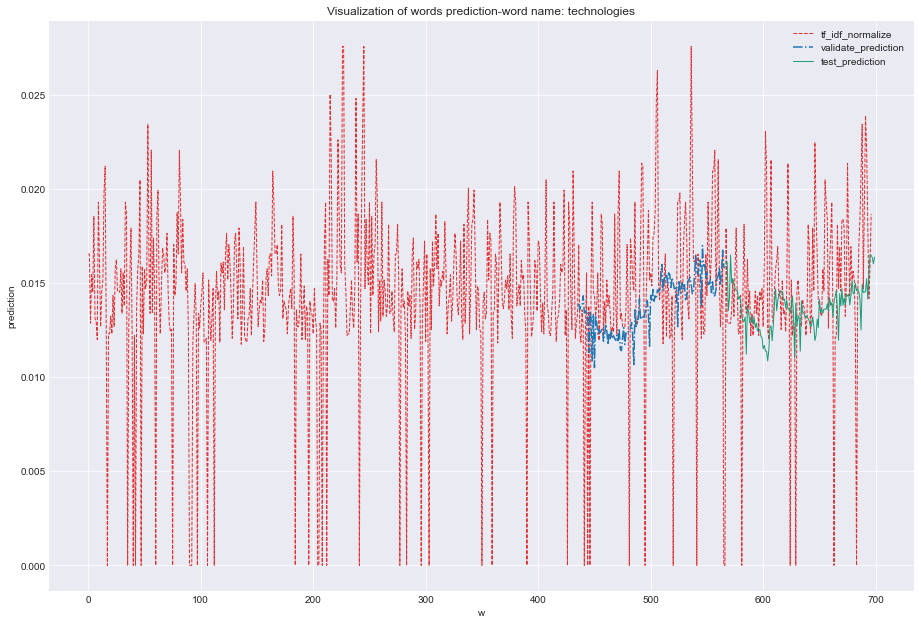

In [54]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

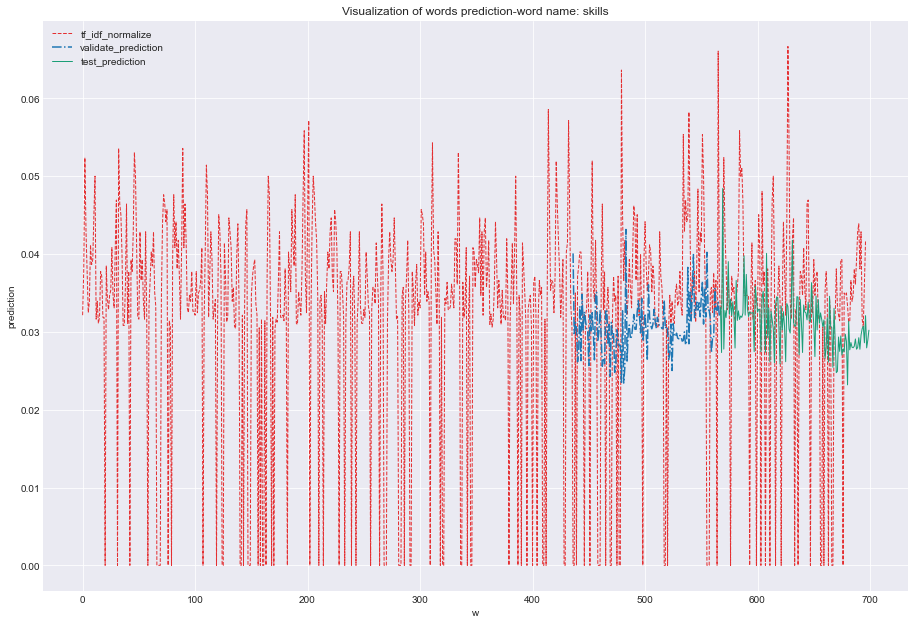

In [55]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

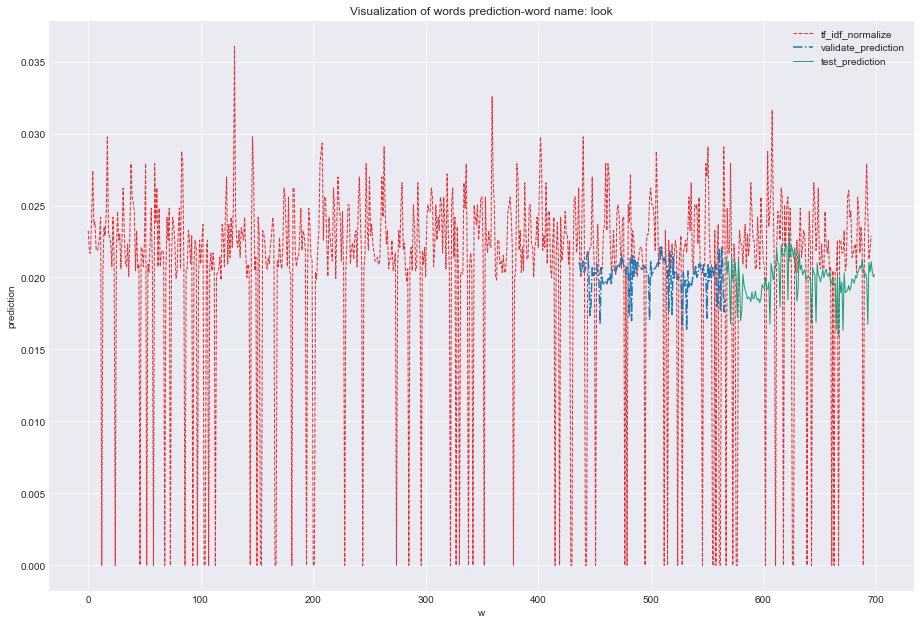

In [56]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MAE

In [57]:
name_model='model_v1/MAE_Bidirectional_model_all_data_V1'
name_history='history_v1/MAE_Bidirectional_model_history_all_data_V1'

In [58]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanAbsoluteError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [59]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


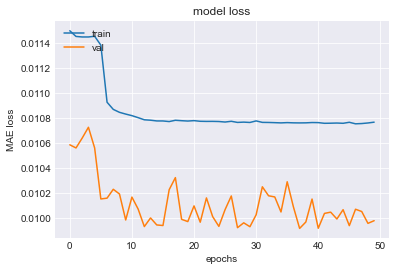

In [60]:
model_obj.model_loss(load_history,'MAE')

In [61]:
# Get a test and valid prediction for a MAE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [62]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 208s 4ms/step - loss: 0.0115


0.011512399651110172

In [63]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[7.386919e-05], [7.386919e-05], [7.386919e-05...   
1  [[7.386919e-05], [7.386919e-05], [7.386919e-05...   
2  [[7.386919e-05], [7.386919e-05], [7.386919e-05...   
3  [[7.386919e-05], [7.386919e-05], [7.386919e-05...   
4  [[7.386919e-05], [7.386919e-05], [7.386919e-05...   

                                     test_prediction  
0  [[7.386919e-05], [7.386919e-05], [7.386919e-05...  
1  [[7.386919e-05], [7.386919e-05], [7.386919e-05...  
2  [[7.386919e-05], [7.386919e-05], [7.386919e-05...  
3  [[7.386919e-05], [7.386919e-05], [7.386919e-05...  
4  [[7.386919e-05], [7.386919e-05], [7.386919e-05...

### Visualization of words prediction - MAE loss

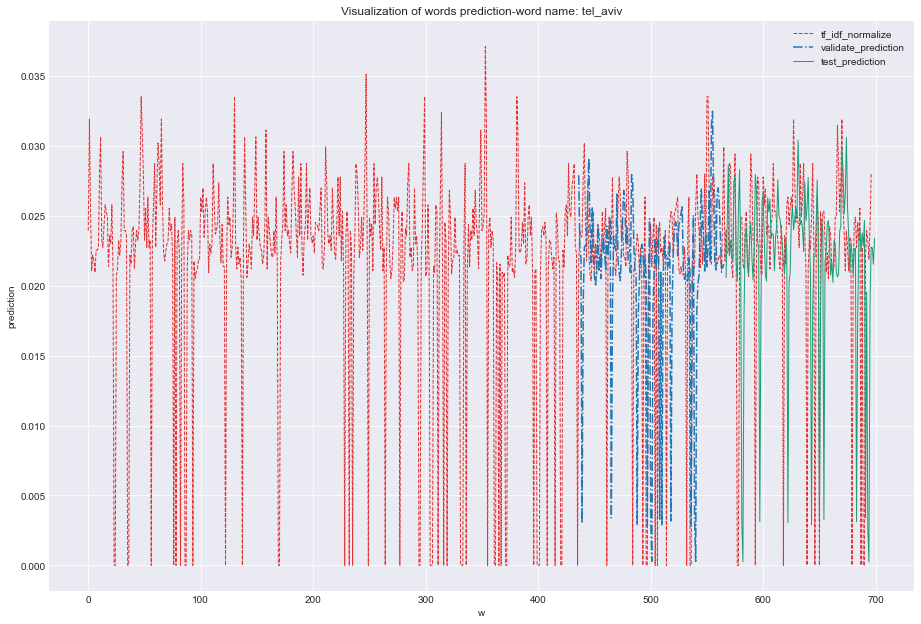

In [64]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

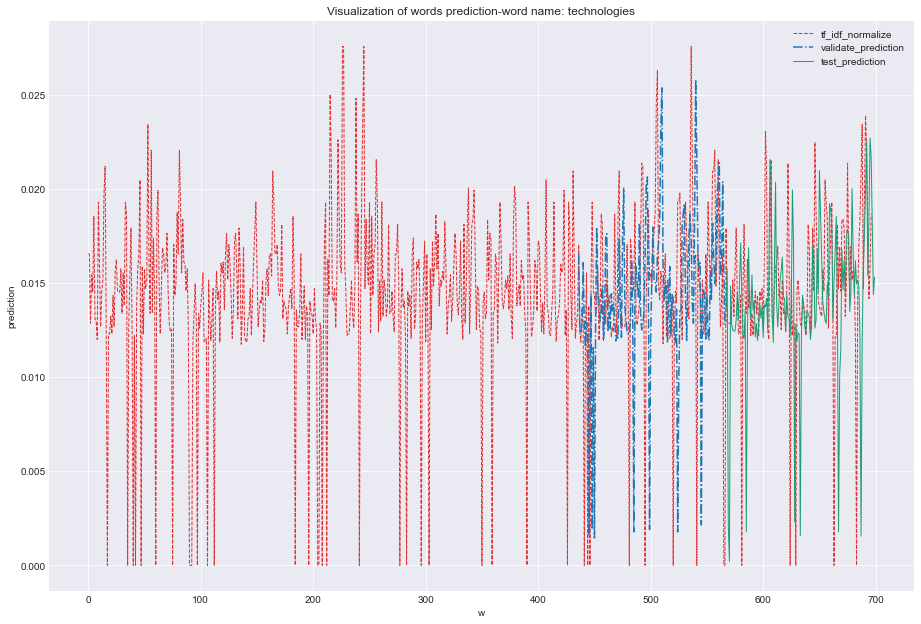

In [65]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

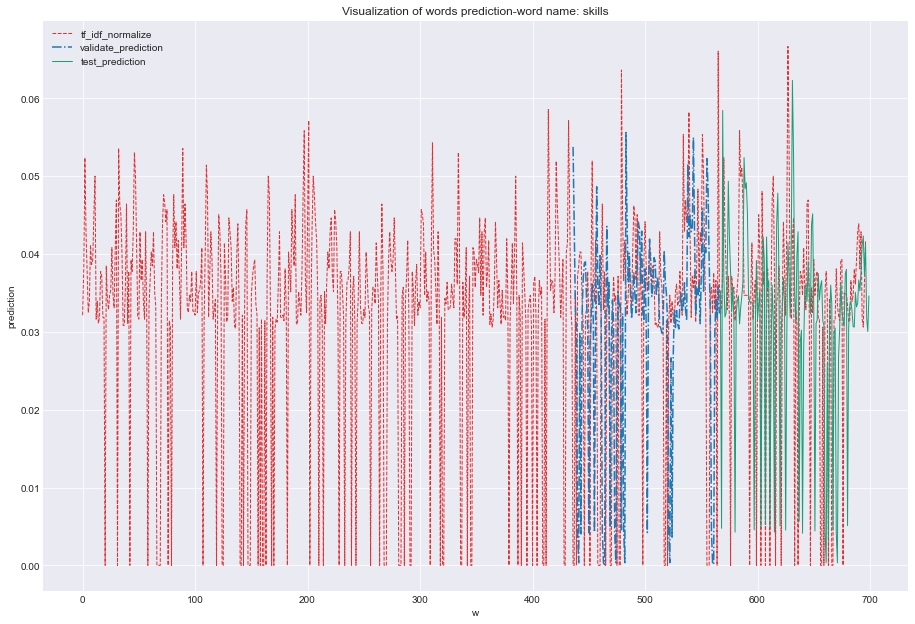

In [66]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

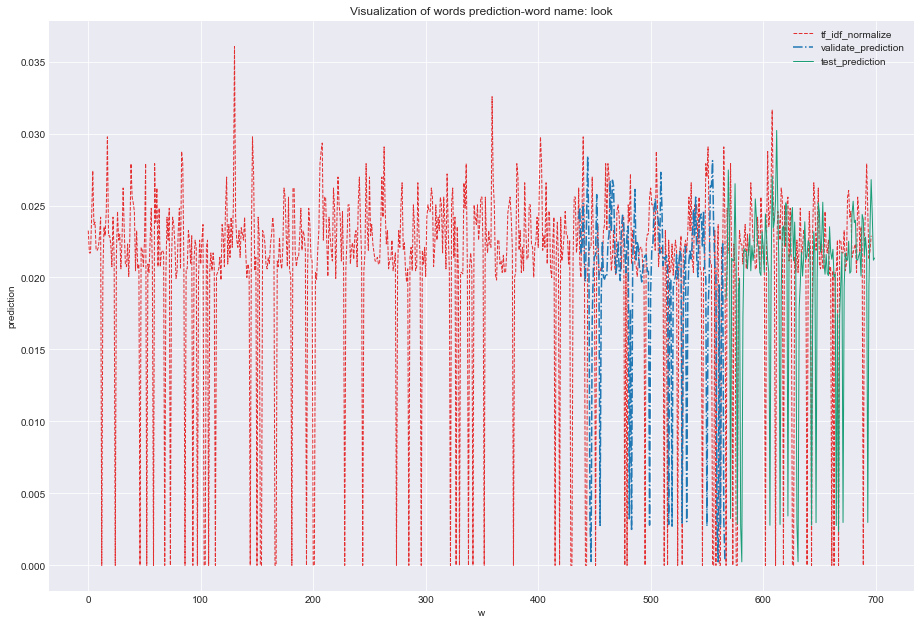

In [67]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

## MSE

In [68]:
name_model='model_v1/MSE_Bidirectional_model_all_data_V1'
name_history='history_v1/MSE_Bidirectional_model_history_all_data_V1'

In [69]:
# Calling the functions of creating a model, fit and saving the model in a file 
model=model_obj.get_model_Bidirectional(n_features,n_steps, tf.keras.losses.MeanSquaredError())
history=model_obj.fit_modle(model,X_train,y_train,X_valid,y_valid, y_train_lenght)
model_obj.save_modle(name_model,name_history,history)

In [70]:
reconstructed_model, load_history=model_obj.load_modle(name_model,name_history)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 40)                3520      
_________________________________________________________________
dense (Dense)                (None, 1)                 41        
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


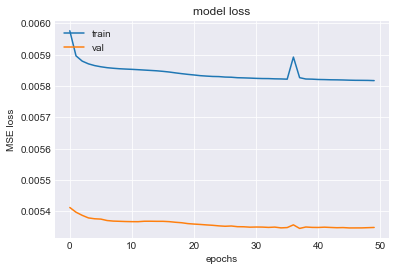

In [71]:
model_obj.model_loss(load_history,'MSE')

In [72]:
# Get a test and valid prediction for a MSE loss function
prediction_valid=model_obj.prediction_valid(reconstructed_model, full_X_valid)
prediction_test=model_obj.prediction_test(reconstructed_model,full_X_test)

In [73]:
# Model evaluation using test loss
prediction_loss=reconstructed_model.evaluate(full_X_test,full_y_test)
prediction_loss

49285/49285 [==============================] - 214s 4ms/step - loss: 0.0064


0.006370213348418474

In [74]:
df_prediction=model_obj.predictive_data_into_dataframe(df_data, prediction_valid,prediction_test, y_valid_lenght, y_test_lenght)
df_prediction.head()

word                                             tf-idf  \
0     ip_enabled  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  av_algorithms  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2        auditor  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          luigi  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4         afraid  [0.0, 0.0, 0.0, 0.0, 0.0, 0.003771094052260297...   

   word_rank  sum_cosine_similarity  \
0       8037              68.201775   
1      11471              42.667847   
2      10517              51.243313   
3       9229              61.277162   
4       2320             174.660634   

                                   tf-idf_after_norm  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.7101724319216592, ...   

                                 validate_prediction  \
0  [[0.0037487792], [0.0037487792], [0.0037487792...   
1  [[0.0037487792], [0.0037487792], [0.0037487792...   
2  [[0.0037487792], [0.0037487792], [0.0037487792...   
3  [[0.0037487792], [0.0037487792], [0.0037487792...   
4  [[0.0037487792], [0.0037487792], [0.0037487792...   

                                     test_prediction  
0  [[0.0037487792], [0.0037487792], [0.0037487792...  
1  [[0.0037487792], [0.0037487792], [0.0037487792...  
2  [[0.0037487792], [0.0037487792], [0.0037487792...  
3  [[0.0037487792], [0.0037487792], [0.0037487792...  
4  [[0.011816808], [0.011737164], [0.011666786], ...

### Visualization of words prediction - MSE loss

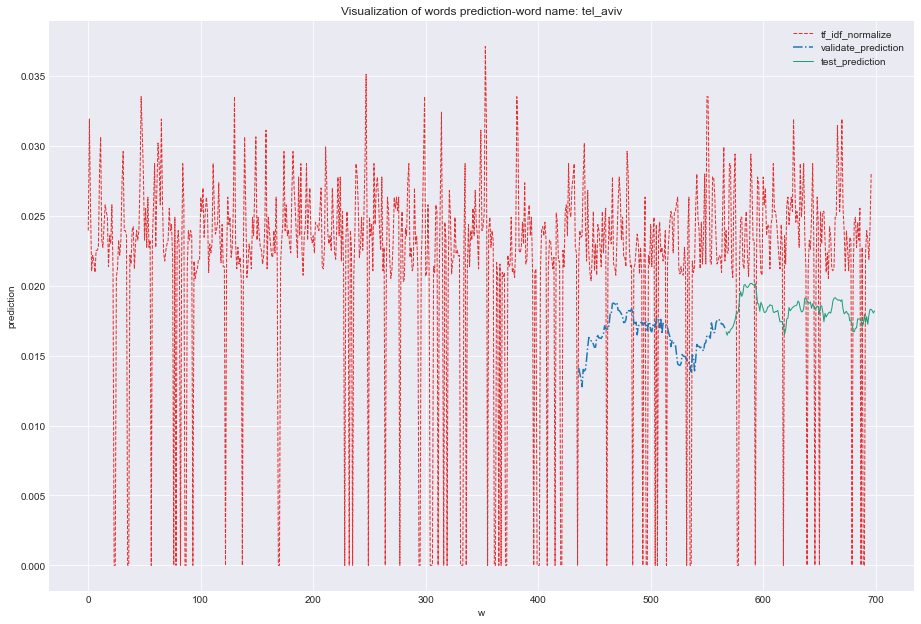

In [75]:
model_obj.data_visualization_prediction(df_prediction,word_list[0:1] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

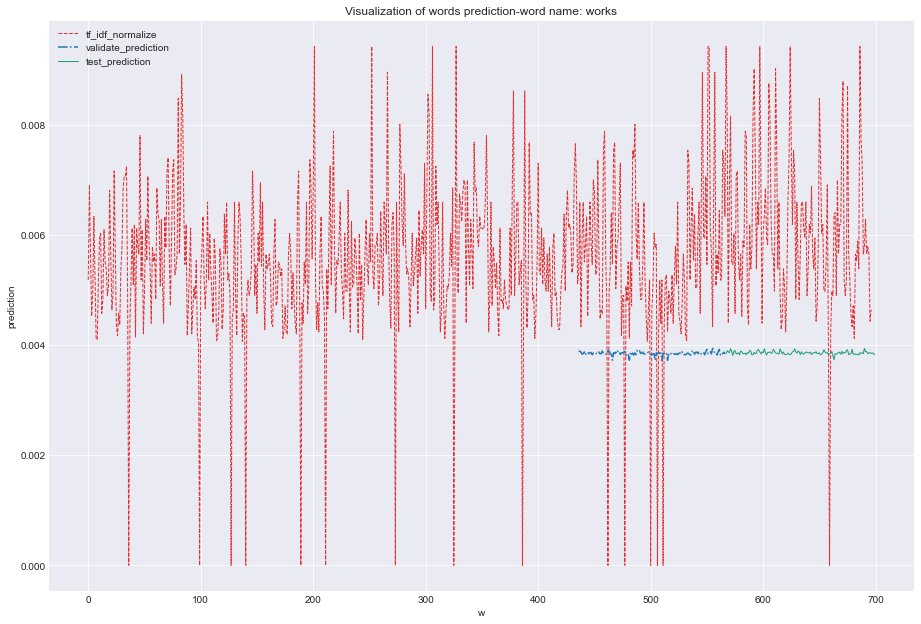

In [76]:
model_obj.data_visualization_prediction(df_prediction,word_list[1:2] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

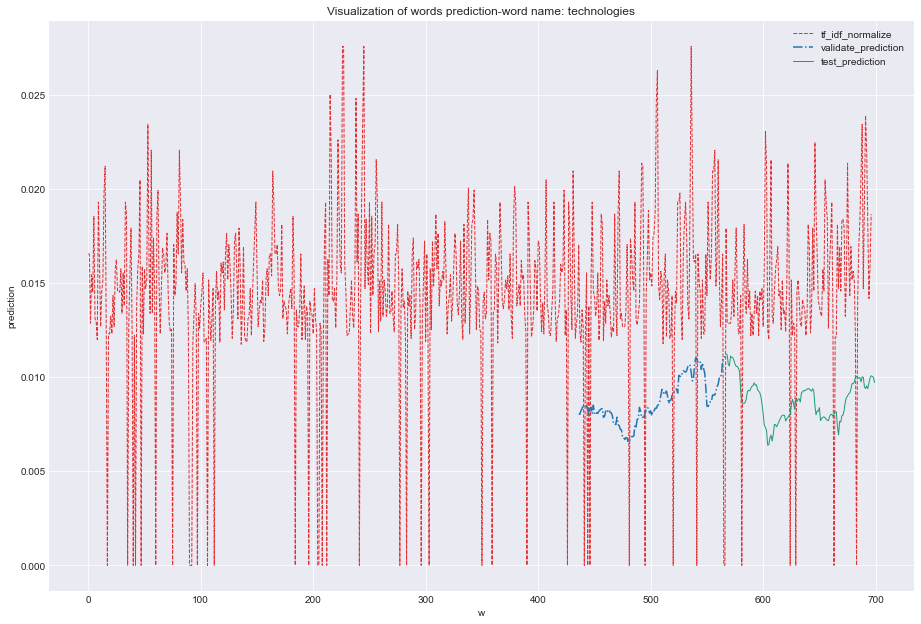

In [77]:
model_obj.data_visualization_prediction(df_prediction,word_list[6:7] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

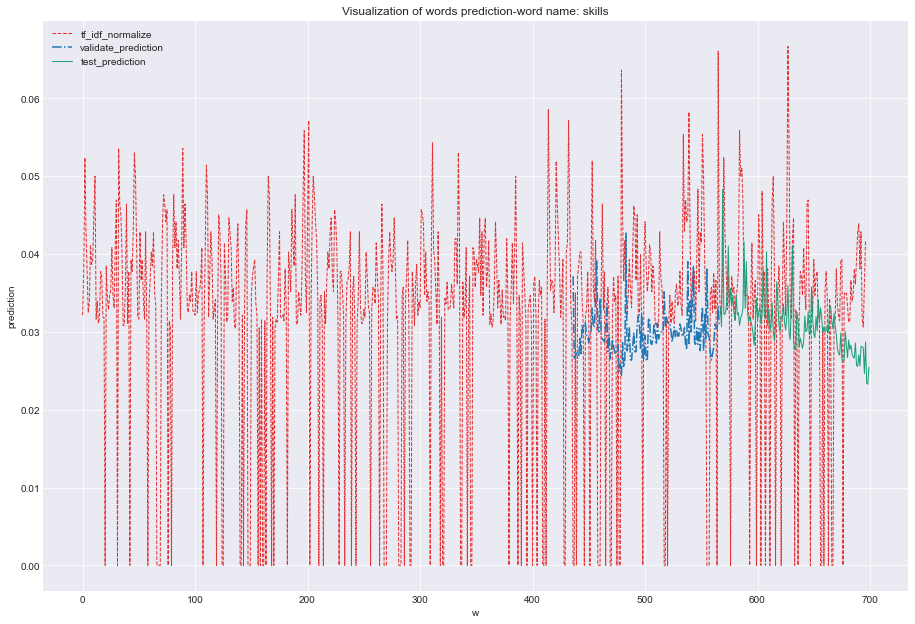

In [78]:
model_obj.data_visualization_prediction(df_prediction,word_list[7:8] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)

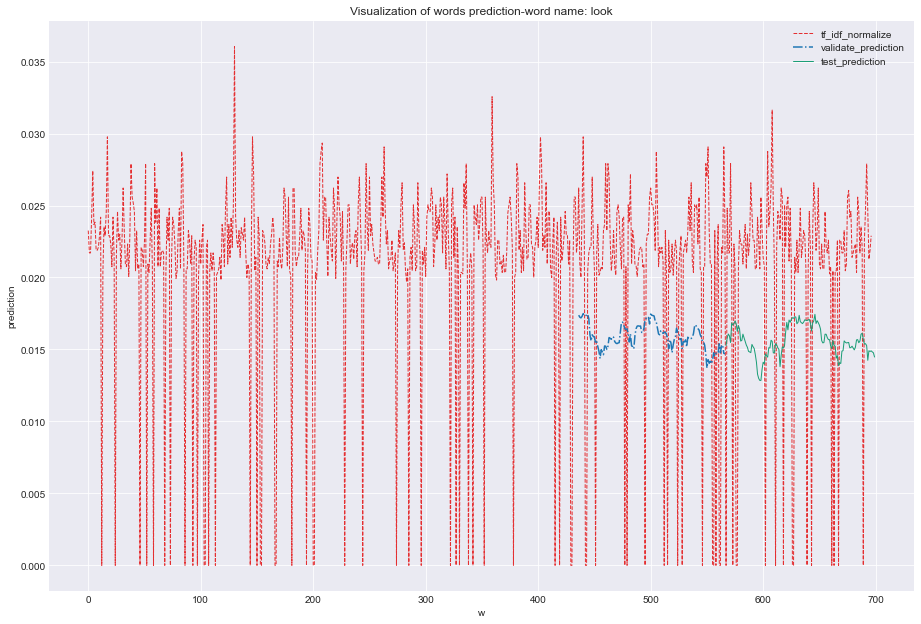

In [79]:
model_obj.data_visualization_prediction(df_prediction,word_list[8:9] ,2,y_train_lenght,y_valid_lenght,y_test_lenght,n_steps)